In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.stats import norm
import math
import numpy as np
import math
import importlib 
from scipy.stats import norm
import scipy.integrate as nInt
from scipy.stats import t as myT
import numpy.linalg as anp
import scipy
from Functions import *

In [2]:
data = pd.read_excel('.\\adatok.xlsx', sheet_name='Sheet3')
states = pd.read_excel('.\\States.xlsx', sheet_name='Sheet1')
data['DATUM'] = data['DATUM'].apply(convert_to_quarterly)
data = pd.merge(data, states, on='DATUM', how='inner')
data

,DATUM,NO_OF_FIRMS_TOTAL,NO_OF_DEFAULTS,LGD1,LGD2,LGD3,LGD4,LGD5,P(D|G),Hectic_m,Mean_Quiet,Mean_Hectic,Quiet_Assignment,Hectic_Assignment,Q_2,H_2,Quiet_2,Hectic_2
0,1996Q1,5231,1,NaN,NaN,NaN,NaN,NaN,0.000191,0,0.972234,0.027766,1,0,0.949872,0.050128,1,0
1,1996Q2,5231,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.952914,0.047086,1,0,0.949872,0.050128,1,0
2,1996Q3,5231,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.947066,0.052934,1,0,0.949872,0.050128,1,0
3,1996Q4,5231,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.905995,0.094005,1,0,0.949872,0.050128,1,0
4,1997Q1,6157,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.958098,0.041902,1,0,0.949872,0.050128,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2023Q4,66385,70,0.306554,0.185995,0.199405,0.300555,0.497117,0.001054,0,0.525664,0.474336,1,0,0.857717,0.142283,1,0
112,2024Q1,62836,58,0.426458,0.276759,0.278882,0.369540,0.590945,0.000923,0,0.335040,0.664960,0,1,0.684815,0.315185,1,0
113,2024Q2,62836,71,0.448654,0.300499,0.315679,0.406456,0.592471,0.001130,0,0.241832,0.758168,0,1,0.487541,0.512459,0,1
114,2024Q3,62836,96,0.337895,0.172183,0.172353,0.306770,0.498617,0.001528,0,0.133307,0.866693,0,1,0.198326,0.801674,0,1


In [3]:
p_mean = data['P(D|G)'].mean()
p_mean

np.float64(0.0011946195896439494)

## Calculating a correalation estimation according to the Basel article

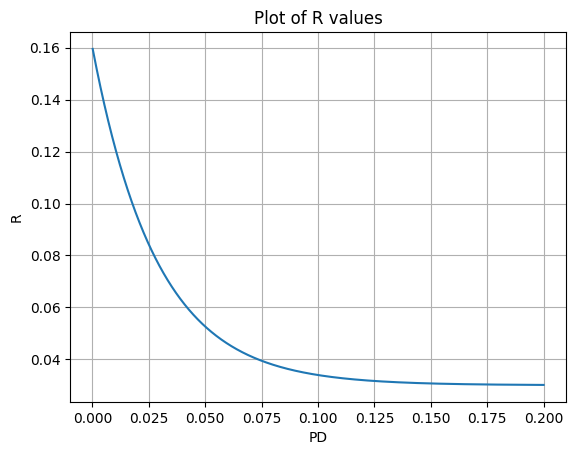

In [4]:
x = np.linspace(0.0001, 0.2, 10000)
R_values = [calculate_R(i) for i in x]

plt.plot(x, R_values)
plt.xlabel('PD')
plt.ylabel('R')
plt.title('Plot of R values')
plt.grid(True)
plt.show()

# One factor Gaussian

In [5]:
#M - number of simulations
#N - number of assets in the portfolio
M = 100
R = calculate_R(p_mean)
rho = R

## Monte carlo method

In [6]:
data['Sim_exp_def'] = None 
data['Sim_exp_def'] = data['Sim_exp_def'].astype(object)

for index, row in data.iterrows():
    N = row['NO_OF_FIRMS_TOTAL']
    p = p_mean
    K = norm.ppf(p) * np.ones((M, 1))
    Y = getGaussianY(N, M, p, rho)
    lossIndicator = 1*np.less(Y,K)
    expected_defaults = lossIndicator.mean(axis=0)
    data.at[index, 'Sim_exp_def'] = expected_defaults.sum().astype(int)

In [7]:
data

,DATUM,NO_OF_FIRMS_TOTAL,NO_OF_DEFAULTS,LGD1,LGD2,LGD3,LGD4,LGD5,P(D|G),Hectic_m,Mean_Quiet,Mean_Hectic,Quiet_Assignment,Hectic_Assignment,Q_2,H_2,Quiet_2,Hectic_2,Sim_exp_def
0,1996Q1,5231,1,NaN,NaN,NaN,NaN,NaN,0.000191,0,0.972234,0.027766,1,0,0.949872,0.050128,1,0,2
1,1996Q2,5231,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.952914,0.047086,1,0,0.949872,0.050128,1,0,2
2,1996Q3,5231,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.947066,0.052934,1,0,0.949872,0.050128,1,0,2
3,1996Q4,5231,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.905995,0.094005,1,0,0.949872,0.050128,1,0,2
4,1997Q1,6157,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.958098,0.041902,1,0,0.949872,0.050128,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2023Q4,66385,70,0.306554,0.185995,0.199405,0.300555,0.497117,0.001054,0,0.525664,0.474336,1,0,0.857717,0.142283,1,0,27
112,2024Q1,62836,58,0.426458,0.276759,0.278882,0.369540,0.590945,0.000923,0,0.335040,0.664960,0,1,0.684815,0.315185,1,0,25
113,2024Q2,62836,71,0.448654,0.300499,0.315679,0.406456,0.592471,0.001130,0,0.241832,0.758168,0,1,0.487541,0.512459,0,1,25
114,2024Q3,62836,96,0.337895,0.172183,0.172353,0.306770,0.498617,0.001528,0,0.133307,0.866693,0,1,0.198326,0.801674,0,1,26


# State dependent model

To get the state dependent models, we need further parameters:<br>
    -$\omega$ : we already estimated in Becslesek.ipynb (estimates dataframe contains this)<br>
    -$\alpha^H$ : the correlation in hectic states (R_hectic)<br>
    -$\alpha^Q$ : the correlation in quiet states: (R_quiet)<br>


In [8]:
p_quiet_m = data.loc[data['Hectic_m'] == 0, 'P(D|G)'].mean()
p_hectic_m = data.loc[data['Hectic_m'] == 1, 'P(D|G)'].mean() 
p_quiet = data.loc[data['Hectic_Assignment'] == 0, 'P(D|G)'].mean()
p_hectic = data.loc[data['Hectic_Assignment'] == 1, 'P(D|G)'].mean()
p_quiet_Q2 = data.loc[data['Hectic_2'] == 0, 'P(D|G)'].mean()
p_hectic_Q2 = data.loc[data['Hectic_2'] == 1, 'P(D|G)'].mean()
print(p_quiet_m, p_hectic_m ,p_quiet, p_hectic,p_quiet_Q2,p_hectic_Q2)

0.0006576842084796814 0.0024149272741081935 0.0003941894366818374 0.0019107939370311018 0.0005236944522032116 0.0020653947680244807


In [9]:
R_quiet_m = calculate_R(p_quiet_m)
R_hectic_m = calculate_R(p_hectic_m)
R_quiet = calculate_R(p_quiet)
R_hectic = calculate_R(p_hectic)
R_quiet_Q2 = calculate_R(p_quiet_Q2)
R_hectic_Q2 = calculate_R(p_hectic_Q2)
print(R_quiet_m, R_hectic_m ,R_quiet, R_hectic,R_quiet_Q2,R_hectic_Q2)

0.15704171577062864 0.14946363266152687 0.15821875391442344 0.15159023507639566 0.15763889505318274 0.15093408360628485


# Quiet state estimation

In [10]:
p = p_quiet_m
R_quiet_m = calculate_R(p_quiet_m)
rho = R_quiet_m
mu = 0.11187969634883446
var = 0.0031607742741719446


data['Sim_exp_def_quiet'] = None

data['Sim_exp_def_quiet'] = data['Sim_exp_def_quiet'].astype(object)
for index, row in data.iterrows():
    N = row['NO_OF_FIRMS_TOTAL']
    K = norm.ppf(p) * np.ones((M, 1))
    Y = getGaussianYCustom(N, M, p, rho,mu,var)
    lossIndicator = 1*np.less(Y,K)
    expected_defaults_quiet = lossIndicator.mean(axis=0)
    data.at[index, 'Sim_exp_def_quiet'] = expected_defaults_quiet.sum().astype(int)

In [11]:
p = p_quiet
R_quiet = calculate_R(p_quiet)
rho = R_quiet


data['Sim_exp_def_quiet_1'] = None

data['Sim_exp_def_quiet_1'] = data['Sim_exp_def_quiet_1'].astype(object)
for index, row in data.iterrows():
    N = row['NO_OF_FIRMS_TOTAL']
    K = norm.ppf(p) * np.ones((M, 1))
    Y = getGaussianYCustom(N, M, p, rho,mu,var)
    lossIndicator = 1*np.less(Y,K)
    expected_defaults_quiet = lossIndicator.mean(axis=0)
    data.at[index, 'Sim_exp_def_quiet_1'] = expected_defaults_quiet.sum().astype(int)

In [12]:
p = p_quiet_Q2
R_quiet_Q2 = calculate_R(p_quiet_Q2)
rho = R_quiet_Q2

data['Sim_exp_def_quiet_Q2'] = None

data['Sim_exp_def_quiet_Q2'] = data['Sim_exp_def_quiet_Q2'].astype(object)
for index, row in data.iterrows():
    N = row['NO_OF_FIRMS_TOTAL']
    K = norm.ppf(p) * np.ones((M, 1))
    Y = getGaussianYCustom(N, M, p, rho,mu,var)
    lossIndicator = 1*np.less(Y,K)
    expected_defaults_quiet = lossIndicator.mean(axis=0)
    data.at[index, 'Sim_exp_def_quiet_Q2'] = expected_defaults_quiet.sum().astype(int)

# Hectic state estimation

In [13]:
p = p_hectic_m
R_hectic_m = calculate_R(p_hectic_m)
rho = R_hectic_m 
mu = 0.03881674477697323
var = 0.0012169976252323896

data['Sim_exp_def_hectic'] = None
data['Sim_exp_def_hectic'] = data['Sim_exp_def_hectic'].astype(object)

for index, row in data.iterrows():
    N = row['NO_OF_FIRMS_TOTAL']
    K = norm.ppf(p) * np.ones((M, 1))
    Y = getGaussianYCustom(N, M, p, rho,mu,var)
    lossIndicator = 1*np.less(Y,K)
    expected_defaults_hectic = lossIndicator.mean(axis=0)
    data.at[index, 'Sim_exp_def_hectic'] = expected_defaults_hectic.sum().astype(int)

In [14]:
p = p_hectic
R_hectic = calculate_R(p_hectic)
rho = R_hectic 

data['Sim_exp_def_hectic_1'] = None
data['Sim_exp_def_hectic_1'] = data['Sim_exp_def_hectic_1'].astype(object)

for index, row in data.iterrows():
    N = row['NO_OF_FIRMS_TOTAL']
    K = norm.ppf(p) * np.ones((M, 1))
    Y = getGaussianYCustom(N, M, p, rho,mu,var)
    lossIndicator = 1*np.less(Y,K)
    expected_defaults_hectic = lossIndicator.mean(axis=0)
    data.at[index, 'Sim_exp_def_hectic_1'] = expected_defaults_hectic.sum().astype(int)

In [15]:
p = p_hectic_Q2
R_hectic_Q2 = calculate_R(p_hectic_Q2)
rho = R_hectic_Q2 

data['Sim_exp_def_hectic_Q2'] = None
data['Sim_exp_def_hectic_Q2'] = data['Sim_exp_def_hectic_Q2'].astype(object)

for index, row in data.iterrows():
    N = row['NO_OF_FIRMS_TOTAL']
    K = norm.ppf(p) * np.ones((M, 1))
    Y = getGaussianYCustom(N, M, p, rho,mu,var)
    lossIndicator = 1*np.less(Y,K)
    expected_defaults_hectic = lossIndicator.mean(axis=0)
    data.at[index, 'Sim_exp_def_hectic_Q2'] = expected_defaults_hectic.sum().astype(int)

# Results

In [16]:
results = data[['DATUM', 'NO_OF_FIRMS_TOTAL', 'NO_OF_DEFAULTS','Sim_exp_def','Sim_exp_def_quiet','Sim_exp_def_hectic', 'Sim_exp_def_quiet_1','Sim_exp_def_hectic_1','Sim_exp_def_quiet_Q2','Sim_exp_def_hectic_Q2']]
results

,DATUM,NO_OF_FIRMS_TOTAL,NO_OF_DEFAULTS,Sim_exp_def,Sim_exp_def_quiet,Sim_exp_def_hectic,Sim_exp_def_quiet_1,Sim_exp_def_hectic_1,Sim_exp_def_quiet_Q2,Sim_exp_def_hectic_Q2
0,1996Q1,5231,1,2,0,5,0,4,0,4
1,1996Q2,5231,0,2,0,5,0,4,0,4
2,1996Q3,5231,0,2,0,5,0,3,0,4
3,1996Q4,5231,0,2,0,5,0,4,0,4
4,1997Q1,6157,0,2,1,6,0,4,0,5
...,...,...,...,...,...,...,...,...,...,...
111,2023Q4,66385,70,27,13,70,7,52,9,57
112,2024Q1,62836,58,25,11,65,6,51,9,55
113,2024Q2,62836,71,25,11,67,6,49,8,55
114,2024Q3,62836,96,26,12,66,6,49,9,55


In [17]:
results.to_excel('Eredmenyek_kulon_normallal.xlsx', index=False)

In [18]:
error_original = data['NO_OF_DEFAULTS']-data['Sim_exp_def']
absolute_error_original = (np.abs(data['NO_OF_DEFAULTS'] - data['Sim_exp_def'])).sum()
mse_original = np.mean(error_original ** 2)
rmse_original = np.sqrt(mse_original)
print("Absolute Error:", absolute_error_original)
print("Mean Squared Error (MSE):", mse_original)
print("Root Mean Squared Error (RMSE):", rmse_original)

Absolute Error: 7877
Mean Squared Error (MSE): 11402.525862068966
Root Mean Squared Error (RMSE): 106.78261029806757


In [19]:
error = np.where(data['Hectic_m'] == 0, data['NO_OF_DEFAULTS'] - data['Sim_exp_def_quiet'], data['NO_OF_DEFAULTS'] - data['Sim_exp_def_hectic'])

absolute_error = np.abs(error).sum()
mse = np.mean(error ** 2)
rmse = np.sqrt(mse)

print("Absolute Error:", absolute_error)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Absolute Error: 6765
Mean Squared Error (MSE): 7594
Root Mean Squared Error (RMSE): 87.14355971613737


In [20]:
error_2 = np.where(data['Quiet_Assignment'] == 0, data['NO_OF_DEFAULTS'] - data['Sim_exp_def_quiet_1'], data['NO_OF_DEFAULTS'] - data['Sim_exp_def_hectic_1'])

absolute_error_2 = np.abs(error_2).sum()
mse_2 = np.mean(error_2 ** 2)
rmse_2 = np.sqrt(mse_2)

print("Absolute Error:", absolute_error_2)
print("Mean Squared Error (MSE):", mse_2)
print("Root Mean Squared Error (RMSE):", rmse_2)

Absolute Error: 9799
Mean Squared Error (MSE): 15083
Root Mean Squared Error (RMSE): 122.81286577553672


In [21]:
error_3 = np.where(data['Quiet_2'] == 0, data['NO_OF_DEFAULTS'] - data['Sim_exp_def_quiet_Q2'], data['NO_OF_DEFAULTS'] - data['Sim_exp_def_hectic_Q2'])

absolute_error_3 = np.abs(error_3).sum()
mse_3 = np.mean(error_3 ** 2)
rmse_3 = np.sqrt(mse_3)

print("Absolute Error:", absolute_error_3)
print("Mean Squared Error (MSE):", mse_3)
print("Root Mean Squared Error (RMSE):", rmse_3)

Absolute Error: 9089
Mean Squared Error (MSE): 14218
Root Mean Squared Error (RMSE): 119.23925528113634


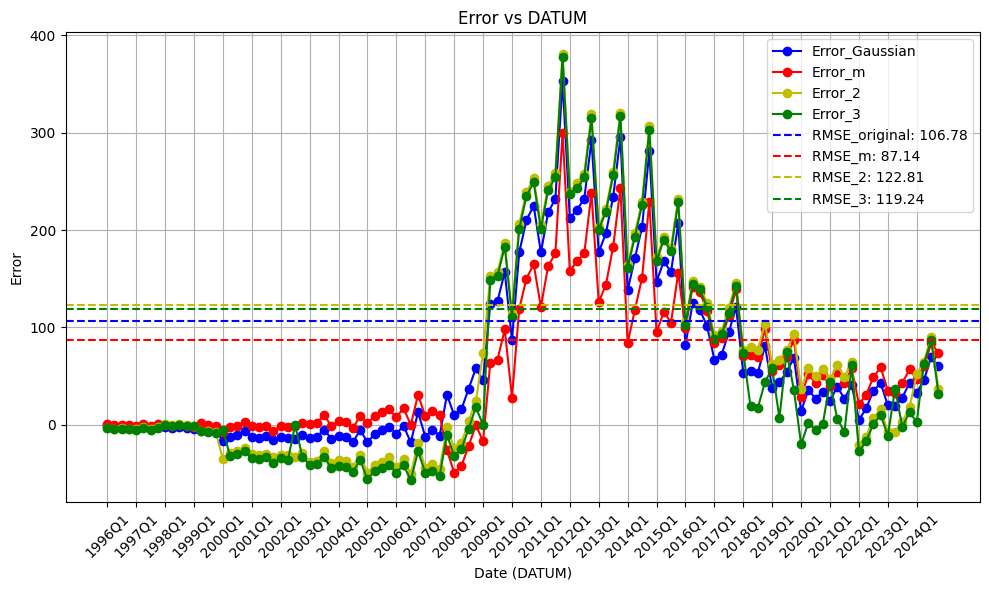

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(data['DATUM'], error_original, marker='o', linestyle='-', color='b', label='Error_Gaussian')
plt.plot(data['DATUM'], error, marker='o', linestyle='-', color='r', label='Error_m')
plt.plot(data['DATUM'], error_2, marker='o', linestyle='-', color='y', label='Error_2')
plt.plot(data['DATUM'], error_3, marker='o', linestyle='-', color='g', label='Error_3')
plt.axhline(rmse_original, color='b', linestyle='--', label=f'RMSE_original: {rmse_original:.2f}')
plt.axhline(rmse, color='r', linestyle='--', label=f'RMSE_m: {rmse:.2f}')
plt.axhline(rmse_2, color='y', linestyle='--', label=f'RMSE_2: {rmse_2:.2f}')
plt.axhline(rmse_3, color='g', linestyle='--', label=f'RMSE_3: {rmse_3:.2f}')
plt.xlabel('Date (DATUM)')
plt.ylabel('Error')
plt.title('Error vs DATUM')
xticks = data['DATUM'][::4]
plt.xticks(xticks, rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# FREY LGD

In [23]:
BaselinePDEstimate = data['P(D|G)'].mean()
BaselinePDEstimate

np.float64(0.0011946195896439494)

In [24]:
LGD = 1 #Only modify this one

lgd = f'LGD{LGD}'
BaselineLGDAverage = data[lgd].mean()
BaselineLGDAverageALL = data[['LGD1', 'LGD2', 'LGD3', 'LGD4', 'LGD5']].stack().mean()
print(BaselineLGDAverage)
print(BaselineLGDAverageALL)
data['lossRate1'] = data['P(D|G)'] * data['LGD1']
data['lossRate2'] = data['P(D|G)'] * data['LGD2']
data['lossRate3'] = data['P(D|G)'] * data['LGD3']
data['lossRate4'] = data['P(D|G)'] * data['LGD4']
data['lossRate5'] = data['P(D|G)'] * data['LGD5']
averageAnnualLossRate = [data['lossRate1'].mean(), data['lossRate2'].mean(), data['lossRate3'].mean(), data['lossRate4'].mean(), data['lossRate5'].mean()]
BaselineLGDWeighted = averageAnnualLossRate[LGD-1]/BaselinePDEstimate
print(BaselineLGDWeighted)

0.2946709761227436
0.29414582805531236
0.37821601449122433


In [25]:
CorrelationEstimate = 0.12 * (1 - math.exp(-50 * BaselinePDEstimate)) / (1 - math.exp(-50)) + 0.24 * (1 - (1 - math.exp(-50 * BaselinePDEstimate)) / (1 - math.exp(-50)))
CorrelationMin = 0.12
CorrelationMax = 0.24
CorrelationEstimate

0.2330421505978185

In [26]:
def frye_jacobs_LGD(ConditionalPD, BaselinePD, BaselineLGD, Correlation):
    ConditionalLGD = norm.cdf((norm.ppf(ConditionalPD) - norm.ppf(BaselinePD) - norm.ppf(BaselinePD * BaselineLGD)) / np.sqrt(1 - Correlation)) / ConditionalPD
    
    return ConditionalLGD

In [27]:
ConditionalPD = 0.10
BaselineLGD1 = BaselineLGDAverage
BaselineLGD2 = BaselineLGDWeighted
Correlation1 = CorrelationMin
Correlation2 = CorrelationEstimate

estimatedLGD1 = frye_jacobs_LGD(ConditionalPD,BaselinePDEstimate,BaselineLGD1,Correlation1)
print(estimatedLGD1)

9.999999790871806


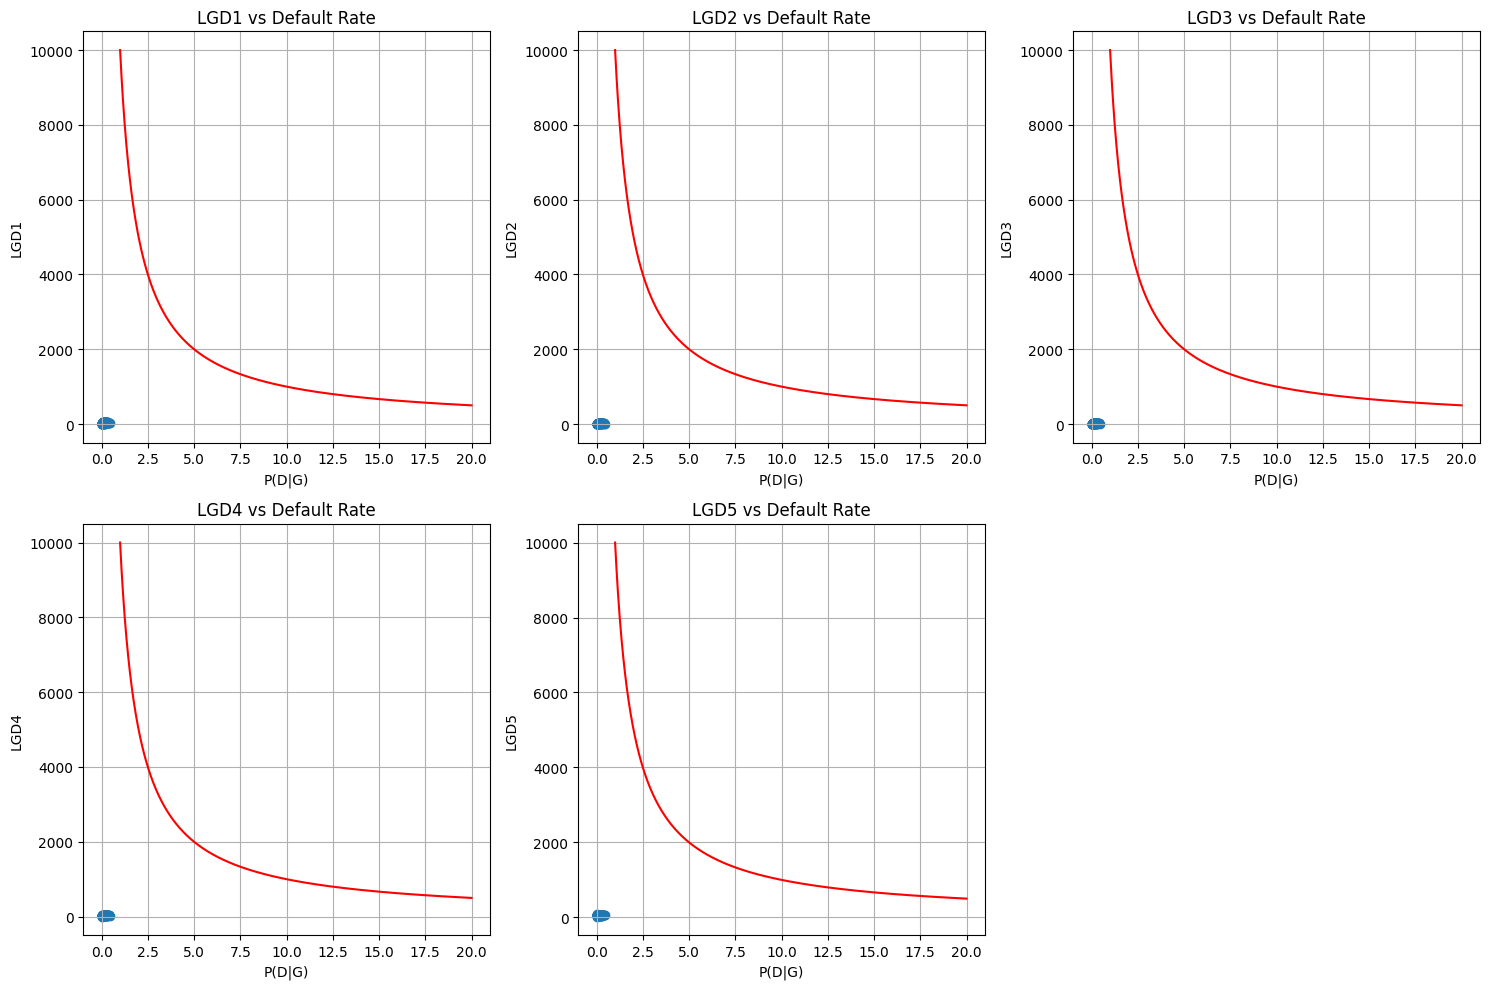

In [28]:
lgd_columns = ['LGD1', 'LGD2', 'LGD3', 'LGD4', 'LGD5']
ConditionalPD = np.linspace(0.01,0.2,1000)
ConditionalLGD1 = frye_jacobs_LGD(ConditionalPD, BaselinePDEstimate, BaselineLGD1, Correlation1)
ConditionalLGD2 = frye_jacobs_LGD(ConditionalPD, BaselinePDEstimate, BaselineLGD2, Correlation2)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  

for i, column in enumerate(lgd_columns):
    axes[i].scatter(100*data['P(D|G)'], 100*data[column], label=column)
    axes[i].set_title(f'{column} vs Default Rate', fontsize=12)
    axes[i].set_xlabel('P(D|G)', fontsize=10)
    axes[i].set_ylabel(column, fontsize=10)
    axes[i].grid(True)

    
    axes[i].plot(100*ConditionalPD, 100*ConditionalLGD1, color = 'red')
for j in range(len(lgd_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()